In [1]:
from large_gcs.example_graphs.spp_gcs import create_spp_2d_graph
from large_gcs.graph.cost_factory import create_l2norm_edge_cost, create_l2norm_squared_edge_cost
import matplotlib.pyplot as plt
import numpy as np


Solving GCS problem...
Result is success!


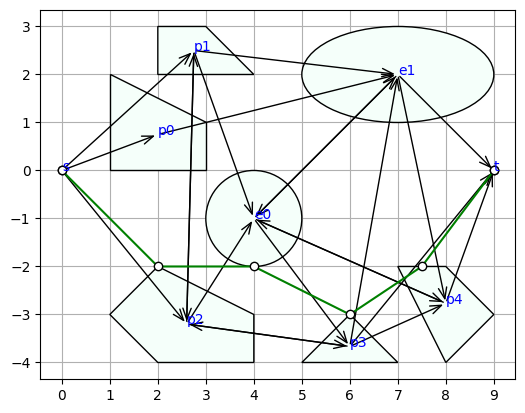

In [2]:
G = create_spp_2d_graph(create_l2norm_squared_edge_cost)

sol = G.solve_shortest_path()
# draw convex sets and edges
plt.figure()
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
G.plot_path(sol.path)
plt.xticks(range(10))
plt.grid()

plt.show()

In [3]:
print(sol)

ShortestPathSolution(cost=13.249999792998235, time=0.03133583068847656, path=[('s', array([0., 0.])), ('p2', array([ 1.99999999, -1.99999999])), ('e0', array([ 3.99999914, -1.99999996])), ('p3', array([ 5.99999995, -2.99999997])), ('p4', array([ 7.49999906, -1.99999999])), ('t', array([9., 0.]))], flows=[0.0, 0.0, 1.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], result=<pydrake.solvers.MathematicalProgramResult object at 0x12d732330>)
